# Methodologies  

1. Data Import & Exploration  
2. Identifying Data and Attributes  
3. Determining the Type of Dataset  
4. Data Quality Assessment  
5. Quantitative Statistics  
6. Application of Proximity (Distance Analysis)  
7. Data Mining: Association Rule Mining  


# Data Import & Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fredapi import Fred
import calendar
import holidays

In [2]:

# Read the CSV file
file_path = 'data/wfp_food_prices_phl.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df

/tmp/ipykernel_15369/2812996776.py:3: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,Maize flour (yellow),KG,actual,Retail,PHP,15.0,0.3717
2,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Wholesale,PHP,18.35,0.4548
3,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,18.0,0.4461
4,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Wholesale,PHP,16.35,0.4052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123090,2021-02-15,Region XIII,Agusan del Norte,Butuan City,8.957268,125.534029,vegetables and fruits,Calamansi,KG,aggregate,Retail,PHP,71.67,1.4949
123091,2021-02-15,Region XIII,Agusan del Norte,Butuan City,8.957268,125.534029,vegetables and fruits,Eggplants,KG,aggregate,Retail,PHP,103.33,2.1555
123092,2021-02-15,Region XIII,Agusan del Norte,Butuan City,8.957268,125.534029,vegetables and fruits,Onions (red),KG,aggregate,Retail,PHP,114.17,2.3814
123093,2021-02-15,Region XIII,Agusan del Norte,Butuan City,8.957268,125.534029,vegetables and fruits,Papaya,KG,aggregate,Retail,PHP,45.0,0.9387


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123095 entries, 0 to 123094
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       123095 non-null  object
 1   admin1     123095 non-null  object
 2   admin2     123095 non-null  object
 3   market     123095 non-null  object
 4   latitude   123095 non-null  object
 5   longitude  123095 non-null  object
 6   category   123095 non-null  object
 7   commodity  123095 non-null  object
 8   unit       123095 non-null  object
 9   priceflag  123095 non-null  object
 10  pricetype  123095 non-null  object
 11  currency   123095 non-null  object
 12  price      123095 non-null  object
 13  usdprice   123095 non-null  object
dtypes: object(14)
memory usage: 13.1+ MB


In [4]:
df = df.drop(index=0).reset_index(drop=True)

In [5]:
# Filter rows where 'priceflag' is either 'actual' or 'aggregate'
filtered_df = df[df['priceflag'].isin(['actual,aggregate'])]

# Display the filtered rows
filtered_df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
119530,2020-05-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,Potatoes (Irish),KG,"actual,aggregate",Retail,PHP,86.16,1.7011
119531,2020-05-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,Rice (premium),KG,"actual,aggregate",Retail,PHP,46.13,0.9108
119532,2020-05-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,"actual,aggregate",Retail,PHP,36.65,0.7236
119533,2020-05-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,Rice (special),KG,"actual,aggregate",Retail,PHP,53.23,1.0509
119534,2020-05-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,"meat, fish and eggs",Eggs,Unit,"actual,aggregate",Retail,PHP,6.83,0.1348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119949,2021-02-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,vegetables and fruits,Calamansi,KG,"actual,aggregate",Retail,PHP,99.45,2.0744
119950,2021-02-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,vegetables and fruits,Ginger,KG,"actual,aggregate",Retail,PHP,156.65,3.2676
119951,2021-02-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,vegetables and fruits,Mangoes (carabao),KG,"actual,aggregate",Retail,PHP,197.03,4.11
119952,2021-02-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,vegetables and fruits,Onions (red),KG,"actual,aggregate",Retail,PHP,111.64,2.3287


In [6]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display duplicate rows
duplicate_rows

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice


In [7]:
categorical_cols = [
    "date", "admin1", "admin2", "market", 
    "category", "commodity", "unit", "priceflag", 
    "pricetype", "currency"
]

numerical_cols = ["latitude", "longitude", "price", "usdprice"]

In [8]:
for col in categorical_cols:
    print(f"Value counts for '{col}':")
    print(df[col].value_counts())
    print("-" * 40)
    

Value counts for 'date':
date
2020-07-15    2795
2020-10-15    2790
2020-08-15    2782
2020-05-15    2745
2020-11-15    2743
              ... 
2020-02-15      18
2019-06-15      18
2004-02-15      18
2019-12-15      16
2019-11-15      16
Name: count, Length: 299, dtype: int64
----------------------------------------
Value counts for 'admin1':
admin1
Region III                              10625
Region VI                                9119
Region V                                 8893
Region VIII                              8525
Cordillera Administrative region         8287
Region XI                                8202
Region X                                 7190
Region IV-B                              7122
Region IV-A                              7084
Region XII                               6996
Region XIII                              6930
Region VII                               6681
Region I                                 6205
Region II                                6151
Reg

In [9]:
print("Descriptive statistics for numerical columns:")
print(df[numerical_cols].describe())

Descriptive statistics for numerical columns:
       latitude longitude   price usdprice
count    123094    123094  123094   123094
unique      192       190   24478    54978
top        7.18    125.44    30.0   0.8092
freq       2438      2438     474       32


In [10]:
df.isnull().sum()

date         0
admin1       0
admin2       0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64

# Data Dictionary

In [11]:
# Data dictionary descriptions for the columns (Updated variable names)
data_descriptions = {
    "date": "Date when the price was recorded",
    "admin1": "First administrative division (region) where the market is located",
    "admin2": "Second administrative division (city) where the market is located",
    "market": "Name of the specific market where the commodity was recorded",
    "latitude": "Latitude coordinate of the market’s location",
    "longitude": "Longitude coordinate of the market’s location",
    "category": "General category to which the commodity belongs (e.g., 'oil and fats', 'cereals and tubers')",
    "commodity": "Specific item being traded (e.g., rice, wheat, tomatoes)",
    "unit": "Measurement unit of the commodity (e.g., kg, liter, piece)",
    "priceflag": "Flag indicating the reliability or nature of the price data (e.g., actual, aggregate)",
    "pricetype": "Type of price recorded (e.g., wholesale, retail, farmgate)",
    "currency": "Currency in which the price was recorded (e.g., USD, PHP)",
    "price": "Recorded price of the commodity in its local currency",
    "usdprice": "Price of the commodity converted into USD"
}


# Create the data dictionary DataFrame
data_dictionary = pd.DataFrame({
    'Column Name': df.columns,
    'Description': [data_descriptions.get(col, 'No description available') for col in df.columns],
    'Data Type': df.dtypes.values
})

# Display the data dictionary
data_dictionary


,Column Name,Description,Data Type
0,date,Date when the price was recorded,object
1,admin1,First administrative division (region) where t...,object
2,admin2,Second administrative division (city) where th...,object
3,market,Name of the specific market where the commodit...,object
4,latitude,Latitude coordinate of the market’s location,object
5,longitude,Longitude coordinate of the market’s location,object
6,category,General category to which the commodity belong...,object
7,commodity,"Specific item being traded (e.g., rice, wheat,...",object
8,unit,"Measurement unit of the commodity (e.g., kg, l...",object
9,priceflag,Flag indicating the reliability or nature of t...,object


# Identifying Data and Attributes

In [12]:
import pandas as pd

# --- Convert Data Types ---
# Convert 'date' to datetime (invalid formats become NaT)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Convert latitude and longitude to numeric (float)
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Convert price and usdprice to numeric (float)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['usdprice'] = pd.to_numeric(df['usdprice'], errors='coerce')

# --- Validate Reasonable Values ---
# Define valid conditions for each column:
valid_date = df['date'].notna()  # Date is valid if not NaT

# Add condition to only include dates on or after January 1, 2019
valid_start_date = df['date'] >= pd.Timestamp('2019-01-01')

# Latitude: valid if not NaN and between -90 and 90
valid_lat = df['latitude'].notna() & (df['latitude'] >= -90) & (df['latitude'] <= 90)

# Longitude: valid if not NaN and between -180 and 180
valid_lon = df['longitude'].notna() & (df['longitude'] >= -180) & (df['longitude'] <= 180)

# Price: valid if not NaN and non-negative
valid_price = df['price'].notna() & (df['price'] >= 0)

# usdprice: valid if not NaN and non-negative
valid_usdprice = df['usdprice'].notna() & (df['usdprice'] >= 0)

# Combine all conditions: only rows meeting all criteria are valid
all_valid = valid_date & valid_start_date & valid_lat & valid_lon & valid_price & valid_usdprice

# --- Create a New DataFrame with Only Valid Rows ---
df_cleaned = df[all_valid].copy()

print("Number of rows before cleaning:", len(df))
print("Number of rows after cleaning:", len(df_cleaned))


Number of rows before cleaning: 123094
Number of rows after cleaning: 100921


In [13]:
# Extract month from the date
df_cleaned['month'] = df_cleaned['date'].dt.month

# Convert month to cyclic features
df_cleaned['month_sin'] = np.sin(2 * np.pi * df_cleaned['month'] / 12)
df_cleaned['month_cos'] = np.cos(2 * np.pi * df_cleaned['month'] / 12)


In [14]:
central_lat = 14.5995   # Example: Latitude for Manila, Philippines
central_lon = 120.9842  # Example: Longitude for Manila, Philippines

# Define the Haversine function to compute distance in kilometers
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # Differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # Haversine formula
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    # Earth's radius in kilometers (6371 km)
    km = 6371 * c
    return km

df_cleaned['distance_from_central'] = haversine_distance(central_lat, central_lon, df_cleaned['latitude'], df_cleaned['longitude'])

print(df_cleaned[['market', 'latitude', 'longitude', 'distance_from_central']].tail())

             market  latitude   longitude  distance_from_central
123089  Butuan City  8.957268  125.534029             799.170559
123090  Butuan City  8.957268  125.534029             799.170559
123091  Butuan City  8.957268  125.534029             799.170559
123092  Butuan City  8.957268  125.534029             799.170559
123093  Butuan City  8.957268  125.534029             799.170559


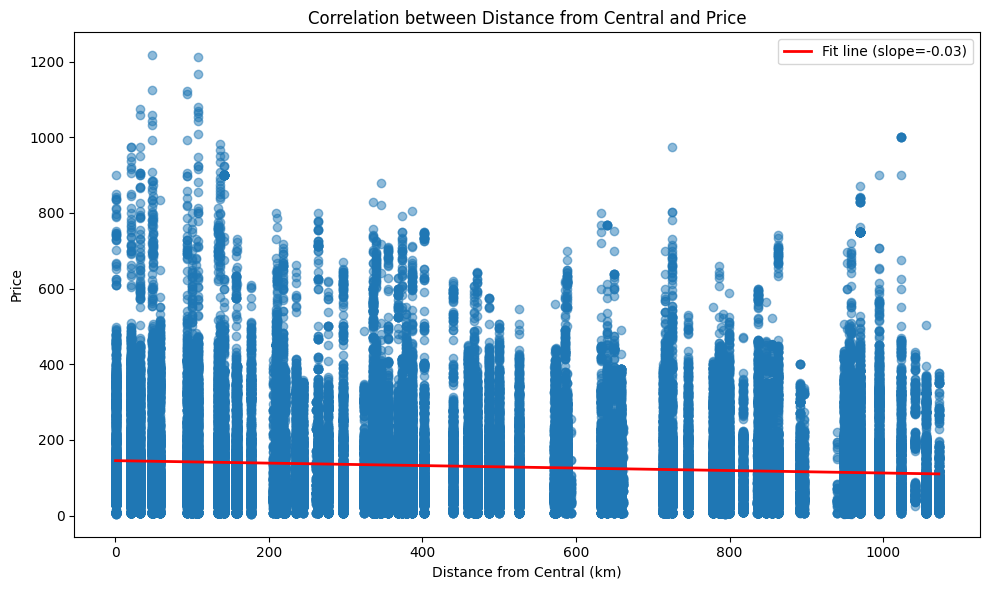

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['distance_from_central'], df_cleaned['price'], alpha=0.5)
plt.xlabel('Distance from Central (km)')
plt.ylabel('Price')
plt.title('Correlation between Distance from Central and Price')

slope, intercept = np.polyfit(df_cleaned['distance_from_central'], df_cleaned['price'], 1)
x_vals = np.array([df_cleaned['distance_from_central'].min(), df_cleaned['distance_from_central'].max()])
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='red', linewidth=2, label=f'Fit line (slope={slope:.2f})')
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
def determine_climate_season(date):
    month = date.month
    if 6 <= month <= 11:
        return "Rainy Season"
    elif month in [12, 1, 2]:
        return "Cool Dry Season"
    elif month in [3, 4, 5]:
        return "Hot Dry Season"
    else:
        return "Unknown"  # Fallback in case of unexpected values

df_cleaned['climate_season'] = df_cleaned['date'].apply(determine_climate_season)


In [17]:
# --- Retrieve USD-PHP Exchange Rate Data from FRED ---
fred = Fred(api_key='3acdf33d996d4189da7cb3843f1c5023') 

# Retrieve the exchange rate series from FRED using NBPHBIS (USD-PHP exchange rate)
exchange_series = fred.get_series('NBPHBIS', observation_start='2019-01-01', observation_end='2025-01-15')

df_exchange = exchange_series.to_frame(name='usd_exchange_rate')
df_exchange.index = pd.to_datetime(df_exchange.index)

# --- Process Exchange Rate Data ---
df_exchange_monthly = df_exchange.resample('M').mean().reset_index()
df_exchange_monthly['date'] = df_exchange_monthly['index'].apply(lambda d: d.replace(day=15))
df_exchange_final = df_exchange_monthly[['date', 'usd_exchange_rate']]

print("Exchange Rate Data (first 5 rows):")
print(df_exchange_final.head())

df_merged = pd.merge(df_cleaned, df_exchange_final, on='date', how='left')

print("\nMerged Data with Exchange Rate (last 5 rows):")
print(df_merged.tail())


Exchange Rate Data (first 5 rows):
        date  usd_exchange_rate
0 2019-01-15              93.76
1 2019-02-15              94.16
2 2019-03-15              93.74
3 2019-04-15              94.87
4 2019-05-15              95.28

Merged Data with Exchange Rate (last 5 rows):
             date       admin1            admin2       market  latitude  \
100916 2021-02-15  Region XIII  Agusan del Norte  Butuan City  8.957268   
100917 2021-02-15  Region XIII  Agusan del Norte  Butuan City  8.957268   
100918 2021-02-15  Region XIII  Agusan del Norte  Butuan City  8.957268   
100919 2021-02-15  Region XIII  Agusan del Norte  Butuan City  8.957268   
100920 2021-02-15  Region XIII  Agusan del Norte  Butuan City  8.957268   

         longitude               category     commodity unit  priceflag  \
100916  125.534029  vegetables and fruits     Calamansi   KG  aggregate   
100917  125.534029  vegetables and fruits     Eggplants   KG  aggregate   
100918  125.534029  vegetables and fruits  Onions 

/tmp/ipykernel_15369/2054416801.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_exchange_monthly = df_exchange.resample('M').mean().reset_index()


In [18]:
def flag_pandemic_phase(date):
    """
    Flag the pandemic phase based on the date.
    
    - Pre-pandemic: before March 1, 2020
    - Pandemic: from March 1, 2020 up to December 31, 2021
    - Post-pandemic: from January 1, 2022 onward
    """
    if date < pd.Timestamp('2020-03-01'):
        return "Pre-pandemic"
    elif date < pd.Timestamp('2022-01-01'):
        return "Pandemic"
    else:
        return "Post-pandemic"
    
df_merged['pandemic_phase'] = df_merged['date'].apply(flag_pandemic_phase)
print(df_merged[['date', 'pandemic_phase']].head(10))

        date pandemic_phase
0 2019-01-15   Pre-pandemic
1 2019-01-15   Pre-pandemic
2 2019-01-15   Pre-pandemic
3 2019-01-15   Pre-pandemic
4 2019-01-15   Pre-pandemic
5 2019-01-15   Pre-pandemic
6 2019-01-15   Pre-pandemic
7 2019-01-15   Pre-pandemic
8 2019-01-15   Pre-pandemic
9 2019-01-15   Pre-pandemic


In [19]:
ph_holidays = holidays.PH(years=range(2019, 2025))

major_holidays_list = [
    "New Year's Day", "Christmas Day",
]

def major_holiday_flag(date, major_list=major_holidays_list):
    """
    Flag whether there is any major holiday within the same month as 'date'.
    Returns 1 if a major holiday is found in that month, otherwise 0.
    """
    year = date.year
    month = date.month
    # Determine the start and end dates of the month
    start_date = pd.Timestamp(year, month, 1)
    end_date = pd.Timestamp(year, month, calendar.monthrange(year, month)[1])
    
    # Check each date in the month for a major holiday
    for single_date in pd.date_range(start_date, end_date):
        if single_date in ph_holidays:
            holiday_name = ph_holidays[single_date]
            # Check if the holiday name matches any in our major list (case insensitive)
            if any(major.lower() in holiday_name.lower() for major in major_list):
                return 1
    return 0

df_merged['major_holiday_flag'] = df_merged['date'].apply(major_holiday_flag)

print(df_merged[['date', 'major_holiday_flag']].head(20))


         date  major_holiday_flag
0  2019-01-15                   1
1  2019-01-15                   1
2  2019-01-15                   1
3  2019-01-15                   1
4  2019-01-15                   1
5  2019-01-15                   1
6  2019-01-15                   1
7  2019-01-15                   1
8  2019-01-15                   1
9  2019-01-15                   1
10 2019-01-15                   1
11 2019-01-15                   1
12 2019-01-15                   1
13 2019-01-15                   1
14 2019-01-15                   1
15 2019-01-15                   1
16 2019-01-15                   1
17 2019-01-15                   1
18 2019-01-15                   1
19 2019-01-15                   1


In [20]:
df_metro = df_merged[df_merged['admin1'] == 'National Capital region']

# Keep only the date and holiday flag columns
df_metro = df_metro[['date', 'major_holiday_flag']].copy()

# Create a 'year' column from the date
df_metro['year'] = df_metro['date'].dt.year

# Sort the DataFrame by date (if not already sorted)
df_metro.sort_values('date', inplace=True)

# Print the table for each year
for year, group in df_metro.groupby('year'):
    print(f"\n--- Year: {year} ---")
    print(group[['date', 'major_holiday_flag']].to_string(index=False))


--- Year: 2019 ---
      date  major_holiday_flag
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-03-15                   0
2019-03-15                   0
2019-03-15         

In [ ]:
import pandas as pd
import numpy as np
from fredapi import Fred

# Initialize Fred with your API key
fred = Fred(api_key='3acdf33d996d4189da7cb3843f1c5023')

# --- Retrieve CPI Data for the Philippines from FRED ---
# Series ID 'CPALTT01PHM657N' is commonly used for CPI data for the Philippines.
cpi_series = fred.get_series('NBPHBIS', observation_start='2018-12-01', observation_end='2025-2-28')

# Convert the series to a DataFrame and ensure the index is datetime
df_cpi = cpi_series.to_frame(name='CPI')
df_cpi.index = pd.to_datetime(df_cpi.index)

# --- Process the CPI Data ---
# Resample the data to monthly frequency (taking the monthly mean, if there are multiple values per month)
df_cpi_monthly = df_cpi.resample('M').mean()

# Compute the monthly inflation rate as the percentage change in CPI
df_cpi_monthly['inflation_rate'] = df_cpi_monthly['CPI'].pct_change() * 100

# Reset index to get the date as a column and adjust each date to the 15th of the month
df_cpi_monthly = df_cpi_monthly.reset_index()
df_cpi_monthly['date'] = df_cpi_monthly['index'].apply(lambda d: d.replace(day=15))

# Keep only the relevant columns: date and inflation_rate
df_inflation = df_cpi_monthly[['date', 'inflation_rate']]
print("Inflation Data (first 5 rows):")
print(df_inflation.head())

# --- Merge the Inflation Data with Your Dataset ---
# Ensure your df_merged has a datetime 'date' column with dates on the 15th
df_merged['date'] = pd.to_datetime(df_merged['date'], errors='coerce')
# Remove the existing inflation_rate column from df_merged if it exists
if 'inflation_rate' in df_merged.columns:
    df_merged = df_merged.drop(columns=['inflation_rate'])
# Merge on the 'date' column (using a left join so that all rows in df_merged are preserved)
df_merged = pd.merge(df_merged, df_inflation, on='date', how='left')

print("\nMerged Data (first 5 rows):")
print(df_merged.head())


If highly correlated = mahalanobis
If prone to outliers = manhattan
Else, euclidean

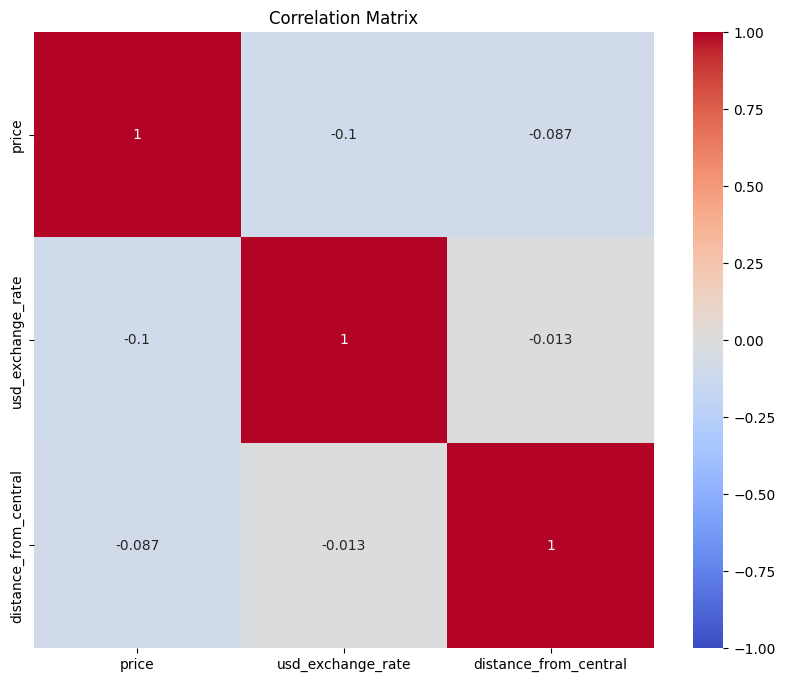

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = ['price', 'usd_exchange_rate', 'distance_from_central', ]

# Compute correlation matrix for numeric variables
correlation_matrix = df_merged[numeric_cols].corr()

# Visualize with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


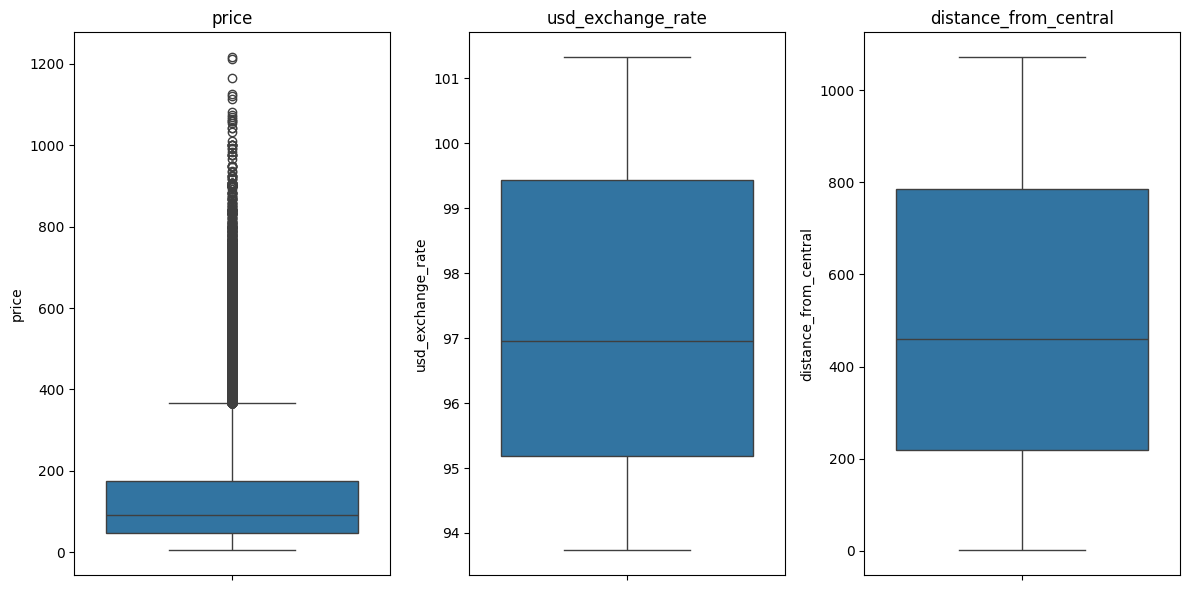

In [22]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i+1)
    sns.boxplot(y=df_merged[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [23]:
print(df_merged[numeric_cols].describe())


               price  usd_exchange_rate  distance_from_central
count  100921.000000      100921.000000          100921.000000
mean      129.023145          97.272745             490.204650
std       117.785798           2.266500             314.791592
min         4.540000          93.730000               0.560898
25%        46.250000          95.180000             219.021237
50%        91.880000          96.960000             459.308311
75%       174.080000          99.440000             786.182027
max      1216.670000         101.330000            1072.393800


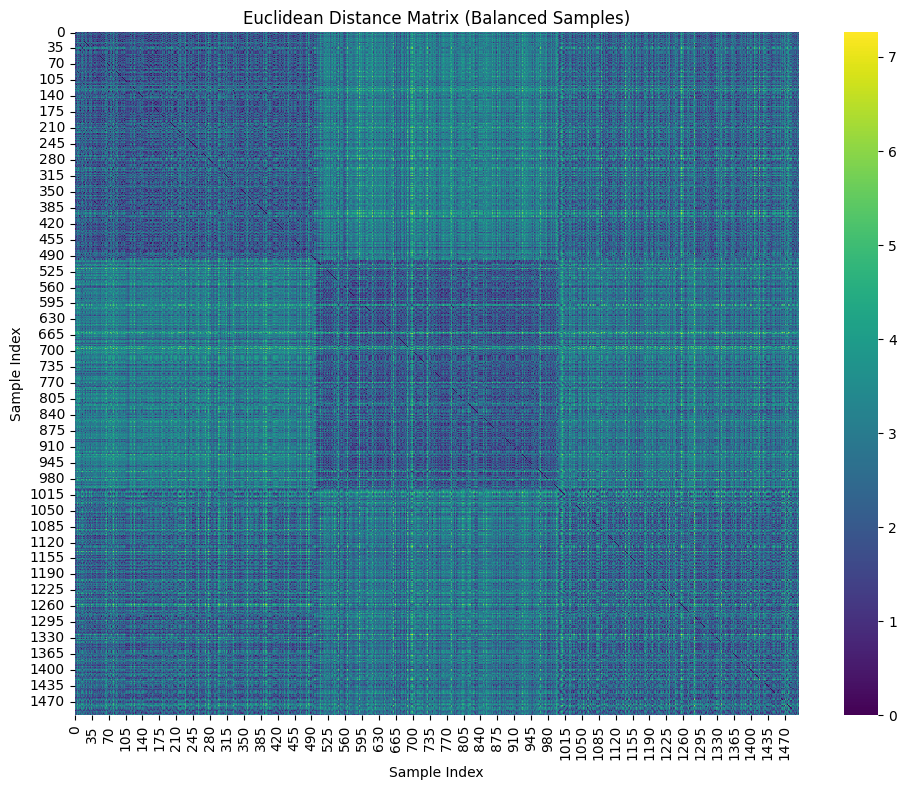

Pre-pandemic - Mean pairwise distance: 2.175
Pandemic - Mean pairwise distance: 2.273
Post-pandemic - Mean pairwise distance: 2.529


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler

# Assume df_merged is your dataset and has a 'pandemic_phase' column and the numeric features:
numeric_cols = ['price_log', 'usd_exchange_rate', 'distance_from_central', 'inflation_rate']

# Drop rows with missing values in the numeric columns
df_numeric = df_merged[numeric_cols + ['pandemic_phase']].dropna()

# Set sample size per phase (e.g., 500)
n_samples_per_phase = 500

# Create a DataFrame to store balanced samples
balanced_samples = []

# Loop through each pandemic phase
for phase in df_numeric['pandemic_phase'].unique():
    phase_data = df_numeric[df_numeric['pandemic_phase'] == phase]
    # If there are more than the desired sample size, sample randomly; otherwise, take all
    if phase_data.shape[0] >= n_samples_per_phase:
        phase_sample = phase_data.sample(n=n_samples_per_phase, random_state=42)
    else:
        phase_sample = phase_data
    balanced_samples.append(phase_sample)

# Concatenate balanced samples
df_balanced = pd.concat(balanced_samples)

# Separate the features and standardize the numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_balanced[numeric_cols])

# Compute the Euclidean distance matrix on the balanced, standardized data
dist_matrix = squareform(pdist(scaled_data, metric='euclidean'))

# Visualize the distance matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dist_matrix, cmap='viridis')
plt.title("Euclidean Distance Matrix (Balanced Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Sample Index")
plt.tight_layout()
plt.show()

# Optionally, compute summary statistics per pandemic phase
df_balanced['scaled_mean_distance'] = np.nan  # placeholder for later computation
# For each phase, compute mean pairwise distance within that phase
for phase in df_balanced['pandemic_phase'].unique():
    phase_indices = df_balanced.index[df_balanced['pandemic_phase'] == phase]
    phase_scaled = scaled_data[np.isin(np.arange(scaled_data.shape[0]), np.where(df_balanced['pandemic_phase'] == phase)[0])]
    phase_dist_matrix = squareform(pdist(phase_scaled, metric='euclidean'))
    mean_distance = np.mean(phase_dist_matrix)
    print(f"{phase} - Mean pairwise distance: {mean_distance:.3f}")


In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from itertools import combinations

# Assume df_merged is your DataFrame and it contains:
# - Numeric columns: 'price_log', 'usd_exchange_rate', 'distance_from_central', 'inflation_rate'
# - A categorical column 'pandemic_phase' with values such as "Pre-pandemic", "Pandemic", "Post-pandemic"

# Define the numeric columns for analysis
numeric_cols = ['price_log', 'usd_exchange_rate', 'inflation_rate']

# Drop rows with missing values in these columns (and keep the 'pandemic_phase' column)
df_numeric = df_merged[numeric_cols + ['pandemic_phase']].dropna()

# Standardize the numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_numeric[numeric_cols])

# Create a DataFrame for the standardized features
df_standardized = pd.DataFrame(scaled_features, columns=numeric_cols, index=df_numeric.index)
df_standardized['pandemic_phase'] = df_numeric['pandemic_phase']

# Compute the centroids (mean vector) for each pandemic phase
centroids = df_standardized.groupby('pandemic_phase')[numeric_cols].mean()
print("Centroids for each pandemic phase:")
print(centroids)

# Calculate Euclidean distances between each pair of centroids
centroid_distances = {}
for phase1, phase2 in combinations(centroids.index, 2):
    vec1 = centroids.loc[phase1].values
    vec2 = centroids.loc[phase2].values
    dist = np.linalg.norm(vec1 - vec2)
    centroid_distances[(phase1, phase2)] = dist

print("\nEuclidean distances between centroids:")
for pair, dist in centroid_distances.items():
    print(f"Distance between {pair[0]} and {pair[1]}: {dist:.3f}")


Centroids for each pandemic phase:
                price_log  usd_exchange_rate  inflation_rate
pandemic_phase                                              
Pandemic        -0.122420           0.954246       -0.071470
Post-pandemic    0.103312          -0.678594        0.045554
Pre-pandemic    -0.629457          -1.123803        0.335025

Euclidean distances between centroids:
Distance between Pandemic and Post-pandemic: 1.653
Distance between Pandemic and Pre-pandemic: 2.177
Distance between Post-pandemic and Pre-pandemic: 0.905


Group sizes: pandemic_phase
Pandemic         42271
Post-pandemic    57443
Pre-pandemic      1207
dtype: int64
Minimum group size for balanced sampling: 1207


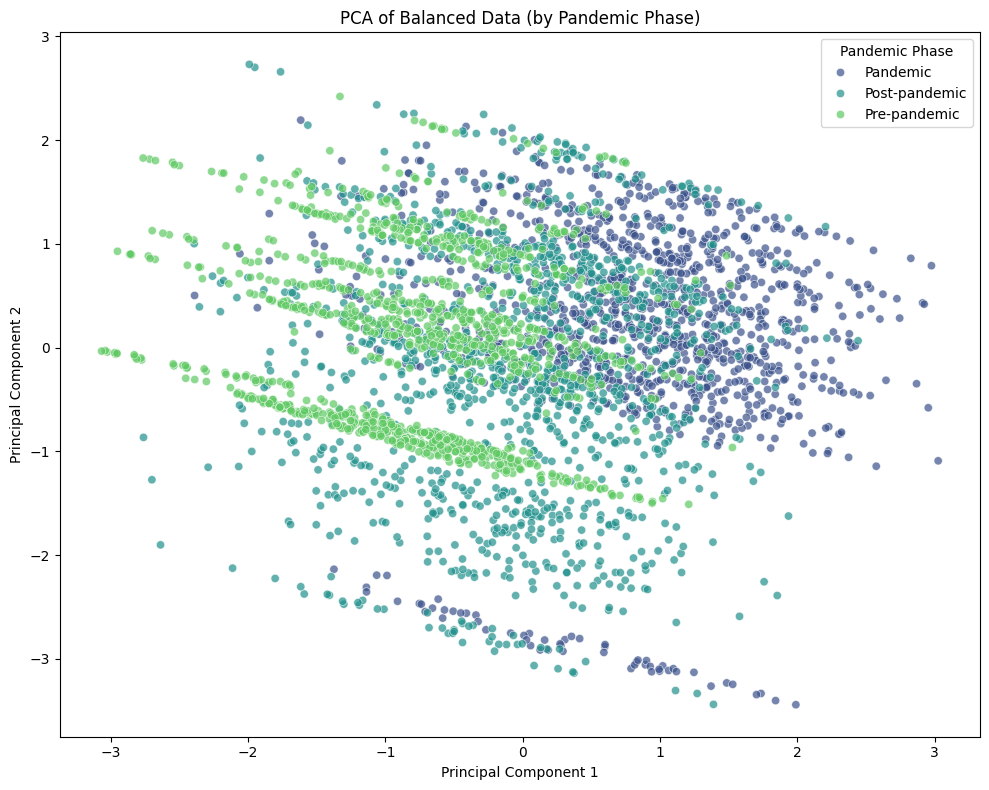

PCA Loadings (Factor Contributions):
                            PC1       PC2
price_log              0.663169 -0.283208
usd_exchange_rate      0.606568  0.389525
distance_from_central -0.438493  0.105724
inflation_rate        -0.002413  0.869992


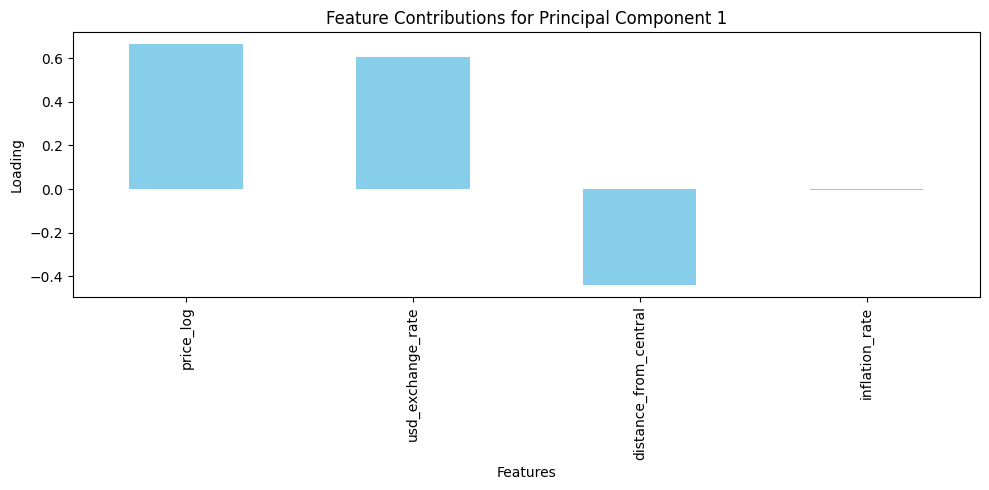

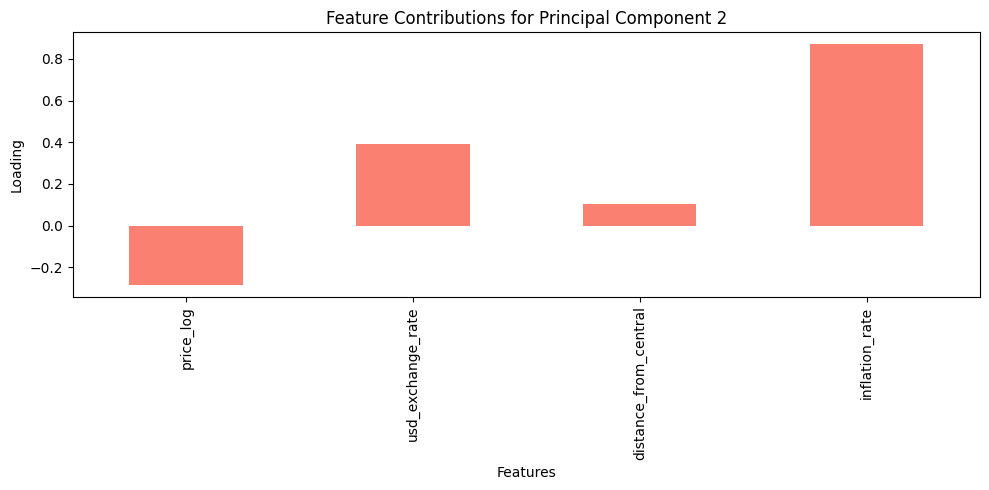

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assume df_merged is your DataFrame and it includes:
# - Numeric features: 'price_log', 'usd_exchange_rate', 'distance_from_central', 'inflation_rate'
# - A categorical variable 'pandemic_phase'

numeric_cols = ['price_log', 'usd_exchange_rate', 'distance_from_central', 'inflation_rate']

# Drop rows with missing values
df_pca = df_merged[numeric_cols + ['pandemic_phase']].dropna()

# Determine the minimum group size across phases
group_sizes = df_pca.groupby('pandemic_phase').size()
min_size = group_sizes.min()
print("Group sizes:", group_sizes)
print("Minimum group size for balanced sampling:", min_size)

# Sample the same number of observations from each pandemic phase
balanced_samples = []
for phase, group in df_pca.groupby('pandemic_phase'):
    balanced_samples.append(group.sample(n=min_size, random_state=42))

df_balanced = pd.concat(balanced_samples)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_balanced[numeric_cols])

# Run PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for visualization of PCA results
df_plot = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=df_balanced.index)
df_plot['pandemic_phase'] = df_balanced['pandemic_phase'].values

# Plot PCA results color-coded by pandemic phase
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='pandemic_phase', palette='viridis', alpha=0.7)
plt.title('PCA of Balanced Data (by Pandemic Phase)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Pandemic Phase')
plt.tight_layout()
plt.show()

# --- Extract and Display PCA Loadings ---
# pca.components_ has shape (n_components, n_features).
# Transpose it to have rows = features and columns = principal components.
loadings = pca.components_.T

# Create a DataFrame for loadings using the original feature names.
df_loadings = pd.DataFrame(loadings, index=numeric_cols, columns=['PC1', 'PC2'])

print("PCA Loadings (Factor Contributions):")
print(df_loadings)

# Optional: Plot the loadings for each principal component
plt.figure(figsize=(10, 5))
df_loadings['PC1'].plot(kind='bar', color='skyblue')
plt.title("Feature Contributions for Principal Component 1")
plt.xlabel("Features")
plt.ylabel("Loading")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
df_loadings['PC2'].plot(kind='bar', color='salmon')
plt.title("Feature Contributions for Principal Component 2")
plt.xlabel("Features")
plt.ylabel("Loading")
plt.tight_layout()
plt.show()


Compute Inflation Rate by Commodity & Pandemic Phase

In [41]:
import pandas as pd
import numpy as np

# Assume df_merged is your DataFrame with at least these columns:
# 'date', 'commodity', 'price', 'pandemic_phase'
df_merged['date'] = pd.to_datetime(df_merged['date'])

# Create a 'month' column (year-month period)
df_merged['month'] = df_merged['date'].dt.to_period('M')

# Group by pandemic_phase, commodity, and month, then compute the average price for that month.
agg_phase = (
    df_merged.groupby(['pandemic_phase', 'commodity', 'month'])['price']
    .mean()
    .reset_index()
)

# Sort by pandemic_phase, commodity, and month so that the percentage change is computed chronologically.
agg_phase = agg_phase.sort_values(by=['pandemic_phase', 'commodity', 'month'])

# Compute the inflation rate (percentage change in average price) for each commodity within each pandemic phase.
agg_phase['inflation_rate'] = (
    agg_phase.groupby(['pandemic_phase', 'commodity'])['price']
    .pct_change() * 100
)

print("Inflation rate by commodity for each pandemic phase:")
print(agg_phase.head(20))


Inflation rate by commodity for each pandemic phase:
   pandemic_phase  commodity    month       price  inflation_rate
0        Pandemic  Anchovies  2020-05  138.673056             NaN
1        Pandemic  Anchovies  2020-06  132.211316       -4.659694
2        Pandemic  Anchovies  2020-07  116.415476      -11.947419
3        Pandemic  Anchovies  2020-08  126.756061        8.882483
4        Pandemic  Anchovies  2020-09  113.047647      -10.814799
5        Pandemic  Anchovies  2020-10  121.309714        7.308482
6        Pandemic  Anchovies  2020-11  144.273824       18.930149
7        Pandemic  Anchovies  2020-12  145.062750        0.546826
8        Pandemic  Anchovies  2021-01  136.053778       -6.210397
9        Pandemic  Anchovies  2021-02  134.666364       -1.019754
10       Pandemic  Anchovies  2021-03  135.530000        0.641316
11       Pandemic  Anchovies  2021-04  131.285789       -3.131565
12       Pandemic  Anchovies  2021-05  137.267556        4.556294
13       Pandemic  Anch

Compute Inflation Rate by Commodity & (Climate Season + Market)

In [44]:
import pandas as pd
import numpy as np

# Assume df_merged is your DataFrame with columns:
# 'date', 'commodity', 'price', 'climate_season', and 'market'
df_merged['date'] = pd.to_datetime(df_merged['date'])

# Create a 'month' column (year-month period)
df_merged['month'] = df_merged['date'].dt.to_period('M')

# Group by market, climate_season, commodity, and month to compute average prices.
agg_geo = (
    df_merged.groupby(['admin1', 'climate_season', 'commodity', 'month'])['price']
    .mean()
    .reset_index()
)

# Sort by market, climate_season, commodity, and month
agg_geo = agg_geo.sort_values(by=['admin1', 'climate_season', 'commodity', 'month'])

# Compute the inflation rate (percentage change in average price) for each commodity within each market & climate season.
agg_geo['inflation_rate'] = (
    agg_geo.groupby(['admin1', 'climate_season', 'commodity'])['price']
    .pct_change() * 100
)

print("Inflation rate by commodity for each combination of climate season and region:")
print(agg_geo.head(20))


Inflation rate by commodity for each combination of climate season and region:
                                  admin1   climate_season          commodity  \
0   Autonomous region in Muslim Mindanao  Cool Dry Season          Anchovies   
1   Autonomous region in Muslim Mindanao  Cool Dry Season          Anchovies   
2   Autonomous region in Muslim Mindanao  Cool Dry Season          Anchovies   
3   Autonomous region in Muslim Mindanao  Cool Dry Season          Anchovies   
4   Autonomous region in Muslim Mindanao  Cool Dry Season          Anchovies   
5   Autonomous region in Muslim Mindanao  Cool Dry Season          Anchovies   
6   Autonomous region in Muslim Mindanao  Cool Dry Season          Anchovies   
7   Autonomous region in Muslim Mindanao  Cool Dry Season          Anchovies   
8   Autonomous region in Muslim Mindanao  Cool Dry Season          Anchovies   
9   Autonomous region in Muslim Mindanao  Cool Dry Season          Anchovies   
10  Autonomous region in Muslim Mindanao 

In [46]:
import pandas as pd
import numpy as np

# Ensure 'date' is datetime
df_merged['date'] = pd.to_datetime(df_merged['date'], errors='coerce')

# Filter for Bananas (lakatan) in Abra for the year 2021
df_2021 = df_merged[
    (df_merged['commodity'] == "Bananas (lakatan)") &
    (df_merged['admin1'] == "National Capital region") &
    (df_merged['date'].dt.year == 2021)
].copy()

# Create a 'month' column as a Period (year-month)
df_2021['month'] = df_2021['date'].dt.to_period('M')

# Group by month and compute the average price for each month
monthly_prices = df_2021.groupby('month')['price'].mean().reset_index()

# Compute the inflation rate as the month-over-month percentage change
monthly_prices['inflation_rate'] = monthly_prices['price'].pct_change() * 100

# Convert the Period index to a timestamp (optional, e.g., set each date to the 15th of the month)
monthly_prices['date'] = monthly_prices['month'].dt.to_timestamp() + pd.offsets.Day(14)

print("Monthly Inflation Rate for Bananas (lakatan) in Abra (2021):")
print(monthly_prices[['date', 'price', 'inflation_rate']])


Monthly Inflation Rate for Bananas (lakatan) in Abra (2021):
        date  price  inflation_rate
0 2021-01-15  79.66             NaN
1 2021-03-15  73.22       -8.084359
2 2021-04-15  73.48        0.355094
3 2021-05-15  73.11       -0.503538
4 2021-06-15  70.21       -3.966626
5 2021-09-15  67.53       -3.817120
6 2021-10-15  65.78       -2.591441
7 2021-11-15  64.13       -2.508361
8 2021-12-15  62.27       -2.900359
